In [134]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 5,5 
rcParams['figure.figsize'] = 16, 10
import scipy, scipy.stats
import numpy as np
import seaborn as sns
sns.set(color_codes=True, font_scale=1.2)

%config InlineBackend.figure_format = 'retina'

%load_ext autoreload
%autoreload 2
from cdf import CDF

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
import json

with open('dist.json') as f:
    data = json.load(f)

# for dist in data:
#     xs, ys = dist['data']['xs'], dist['data']['ys']
#     sns.lineplot(xs, ys)
    
cdfs = []
for dist in data:
    xs, ys = np.array(dist['data']['xs']), np.array(dist['data']['ys'])
    cdfs.append(CDF(x=xs, F=ys)) 

TODO:
 ~~pass input to js script through stdin~~
 ~~test sample (rvs) function~~
 ~~test combining two cdfs~~
 ~~test combining multiple cdfs~~
 ~~test combining cdf with itself~~
 ~~test convertToNewLength~~
 test convertWithAlternativeXs
    
    


In [77]:
import subprocess

def run_js_script(params, script_input):
    path_to_js_script = '../foretold_server/cdf/py_test.js'


    for cdf in cdfs:
        script_run = subprocess.run(
            ['node', path_to_js_script] + [str(p) for p in params],
            input=script_input.encode(),
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE
        )
        
        try:
            result = json.loads(script_run.stdout.decode('utf-8'))
            return result
        except:
            print(script_run.stderr.decode('utf-8'))
            raise



Test the sample method by plotting samples output by python code vs the output of the JS version

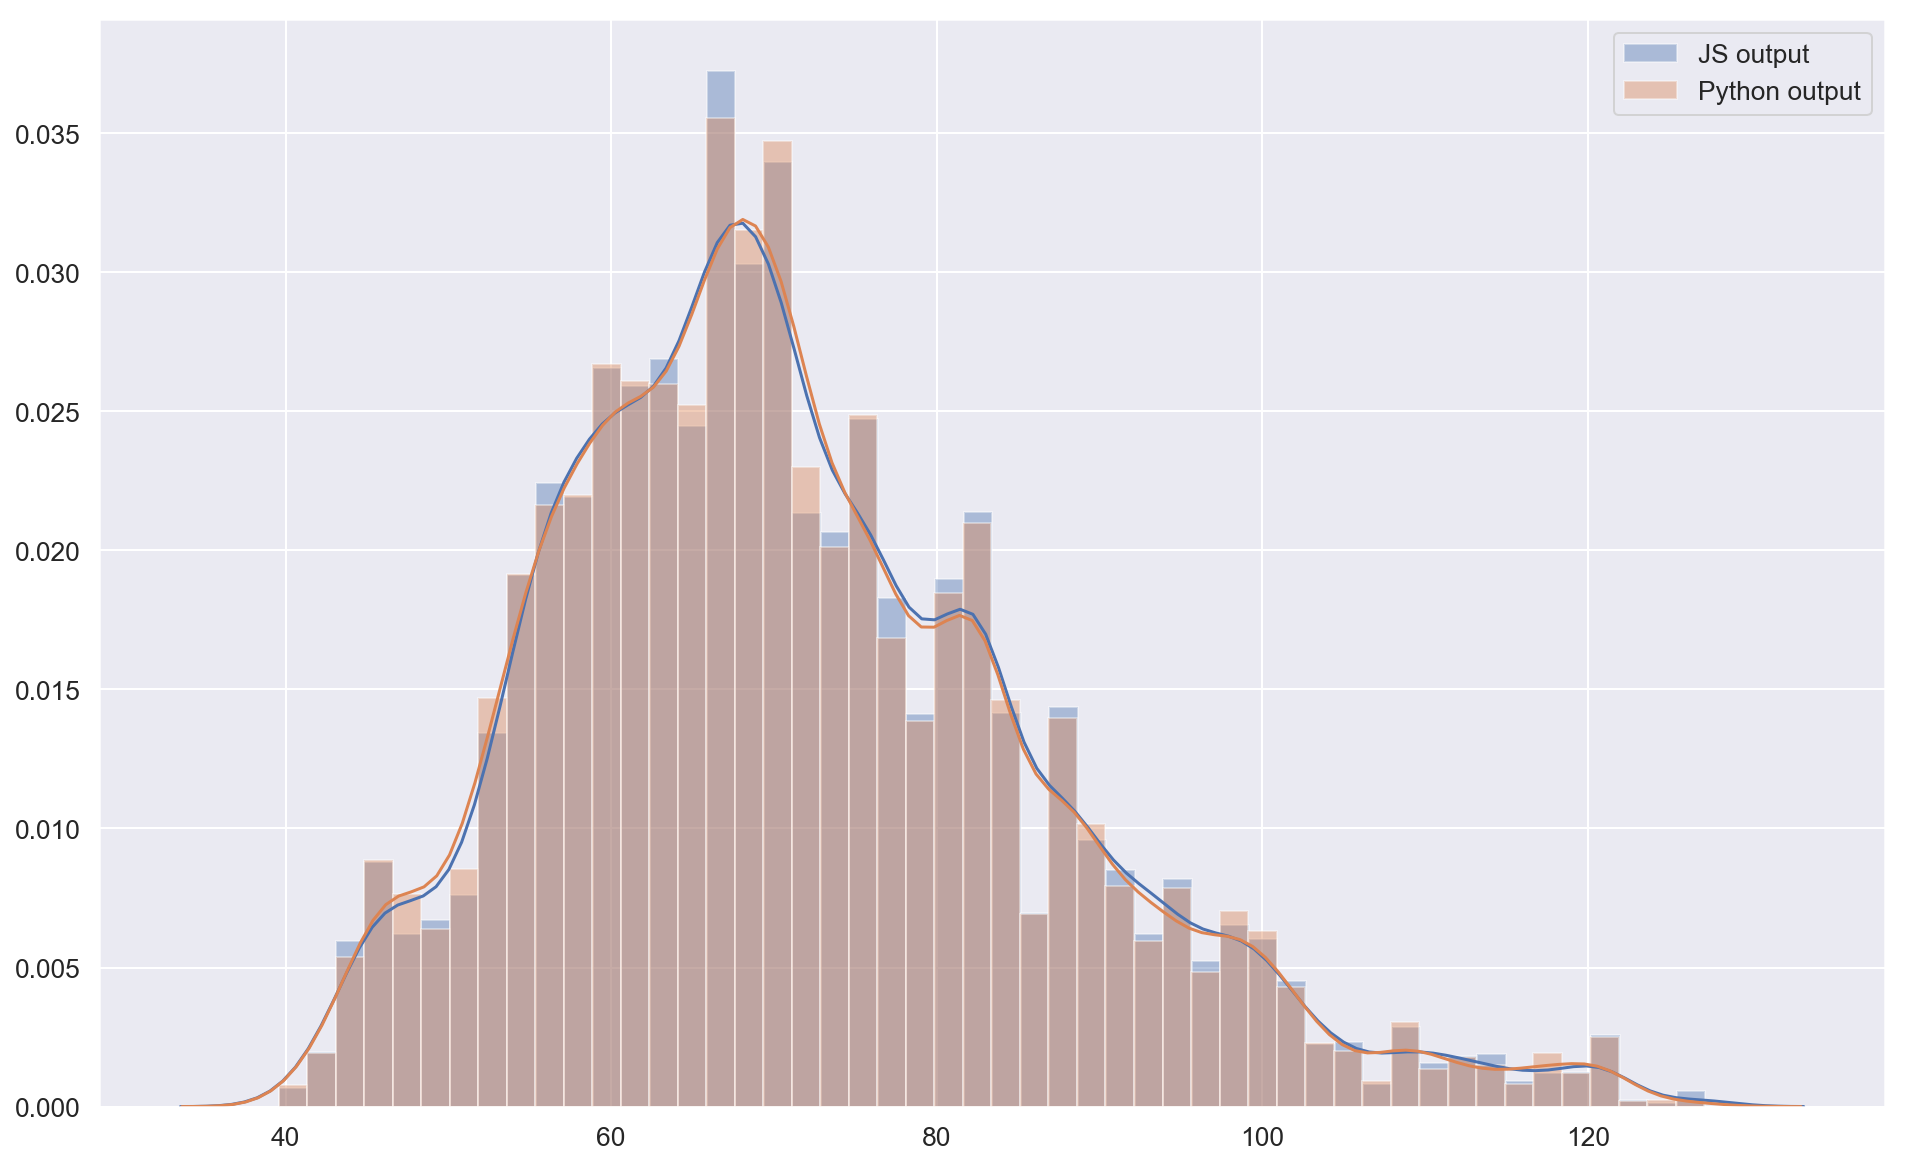

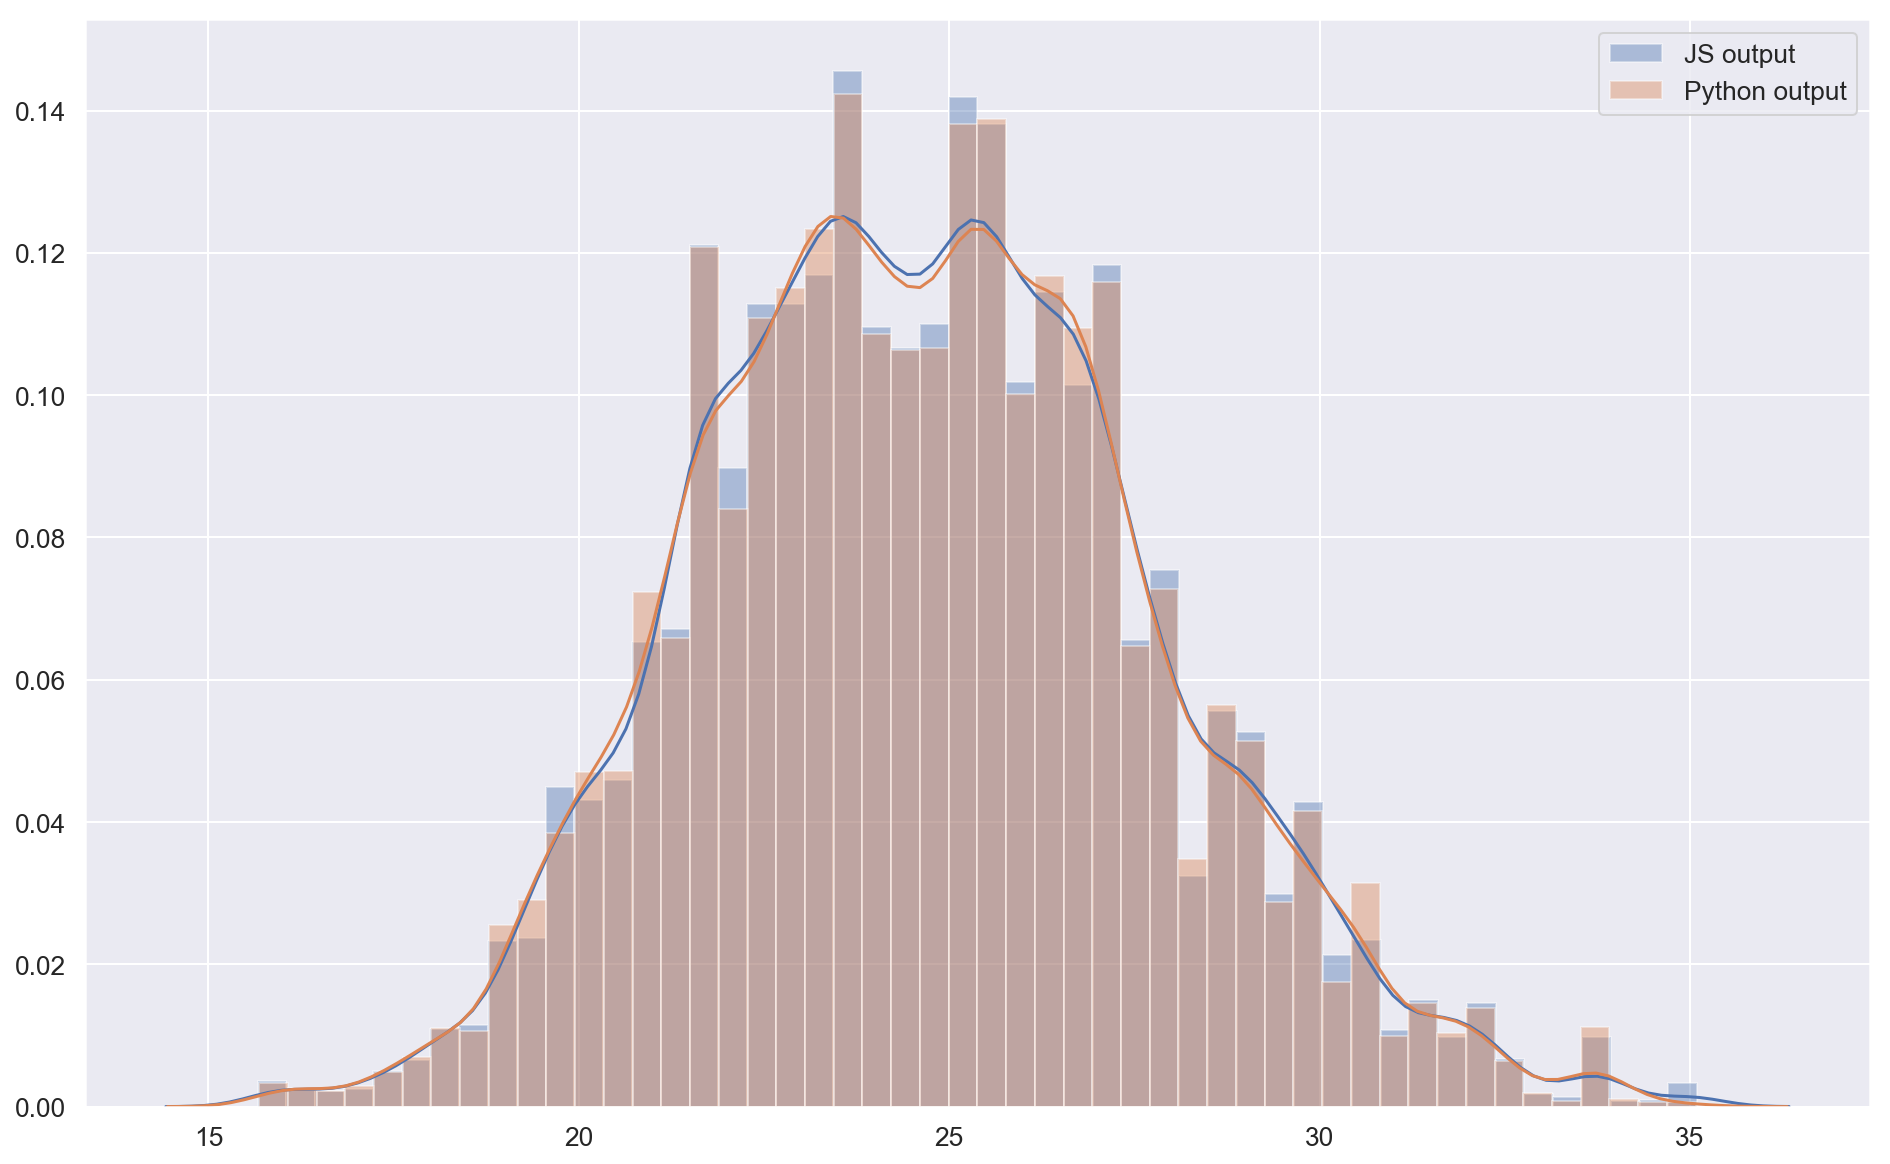

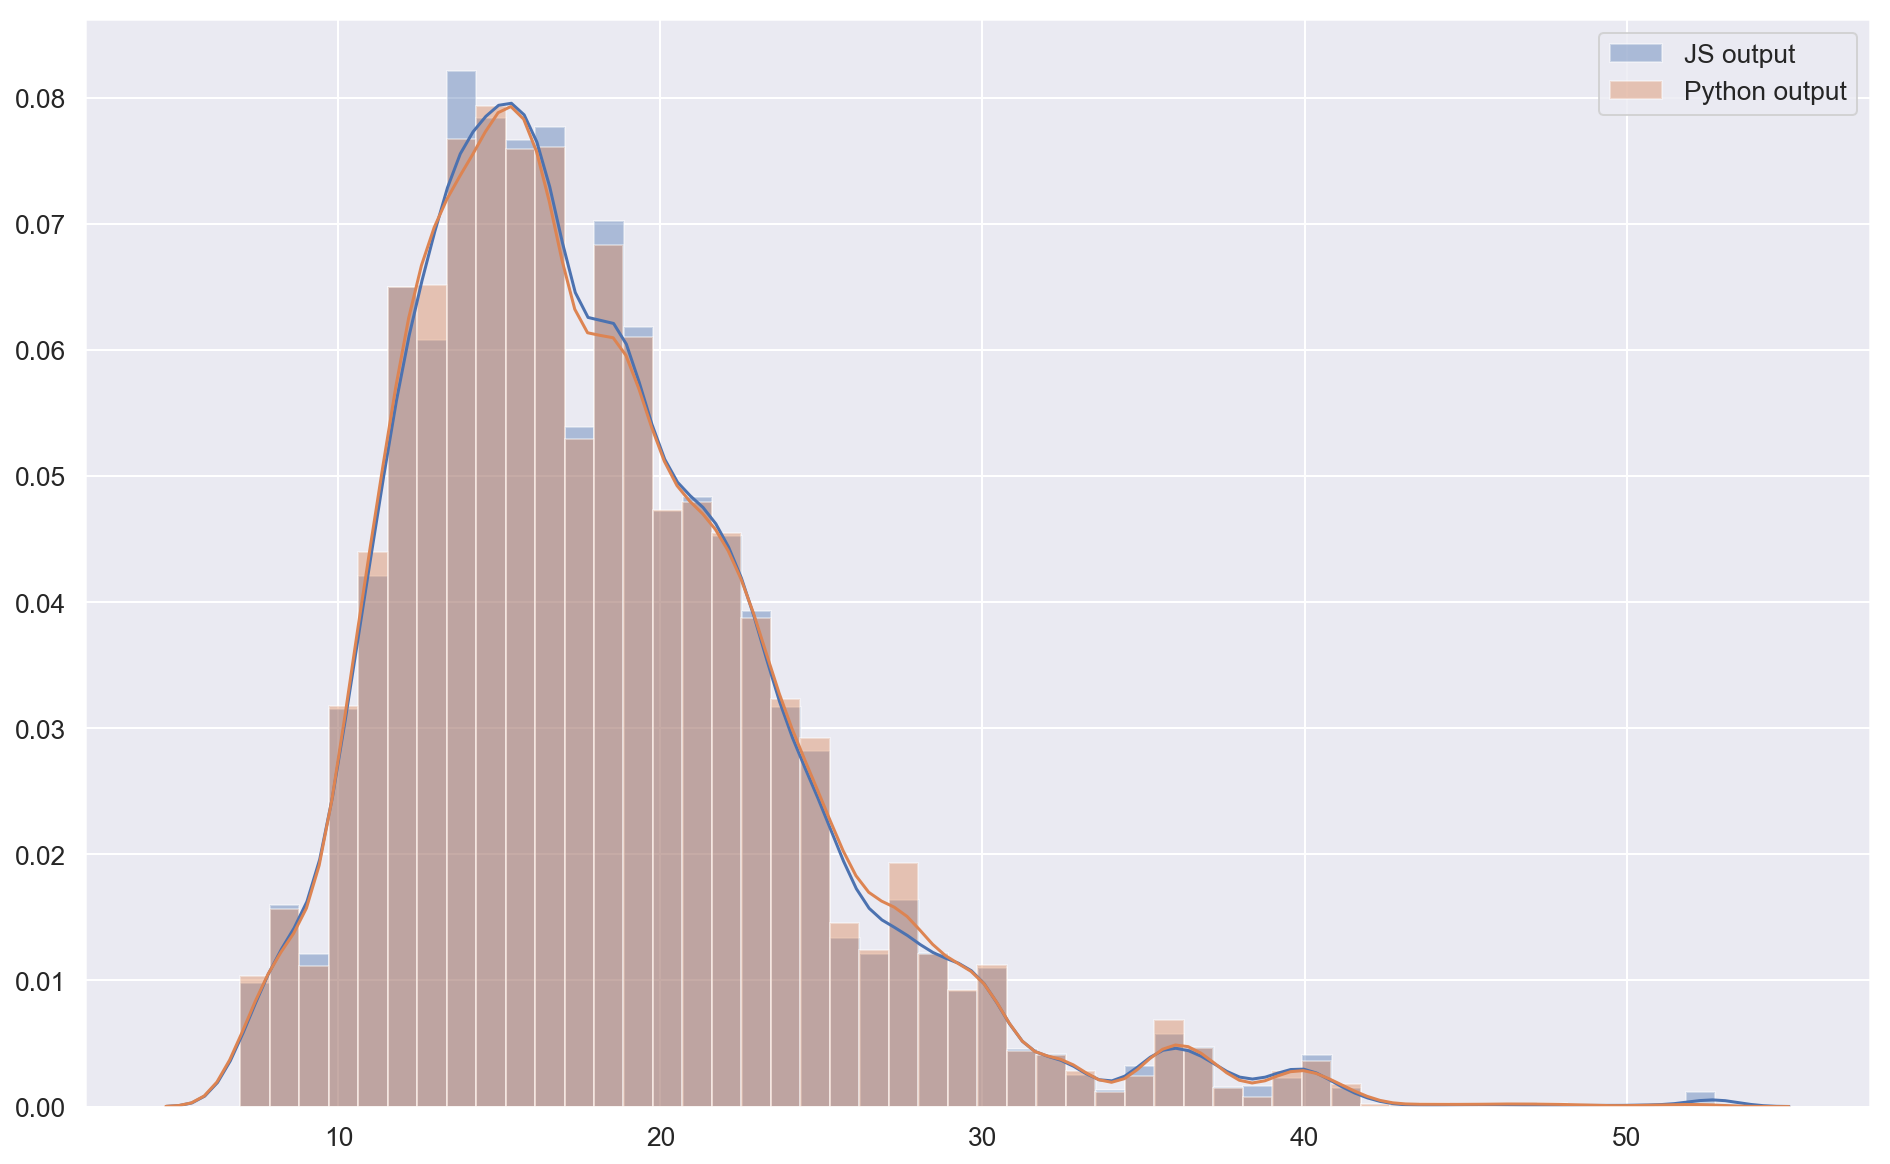

In [135]:

N_samples = 30000
for cdf in cdfs:
    script_input = json.dumps([cdf.get_raw_data()])
    result = run_js_script(['rvs', N_samples], script_input)
        
    try:
        plt.figure()
        sample = result
        sns.distplot(sample, label='JS output')
        
        py_sample = cdf.rvs(N_samples)
        sns.distplot(py_sample, label='Python output')
        plt.legend()
        
    except:
        print(script_run.stderr.decode('utf-8'))





Test combining pairs of CDFs

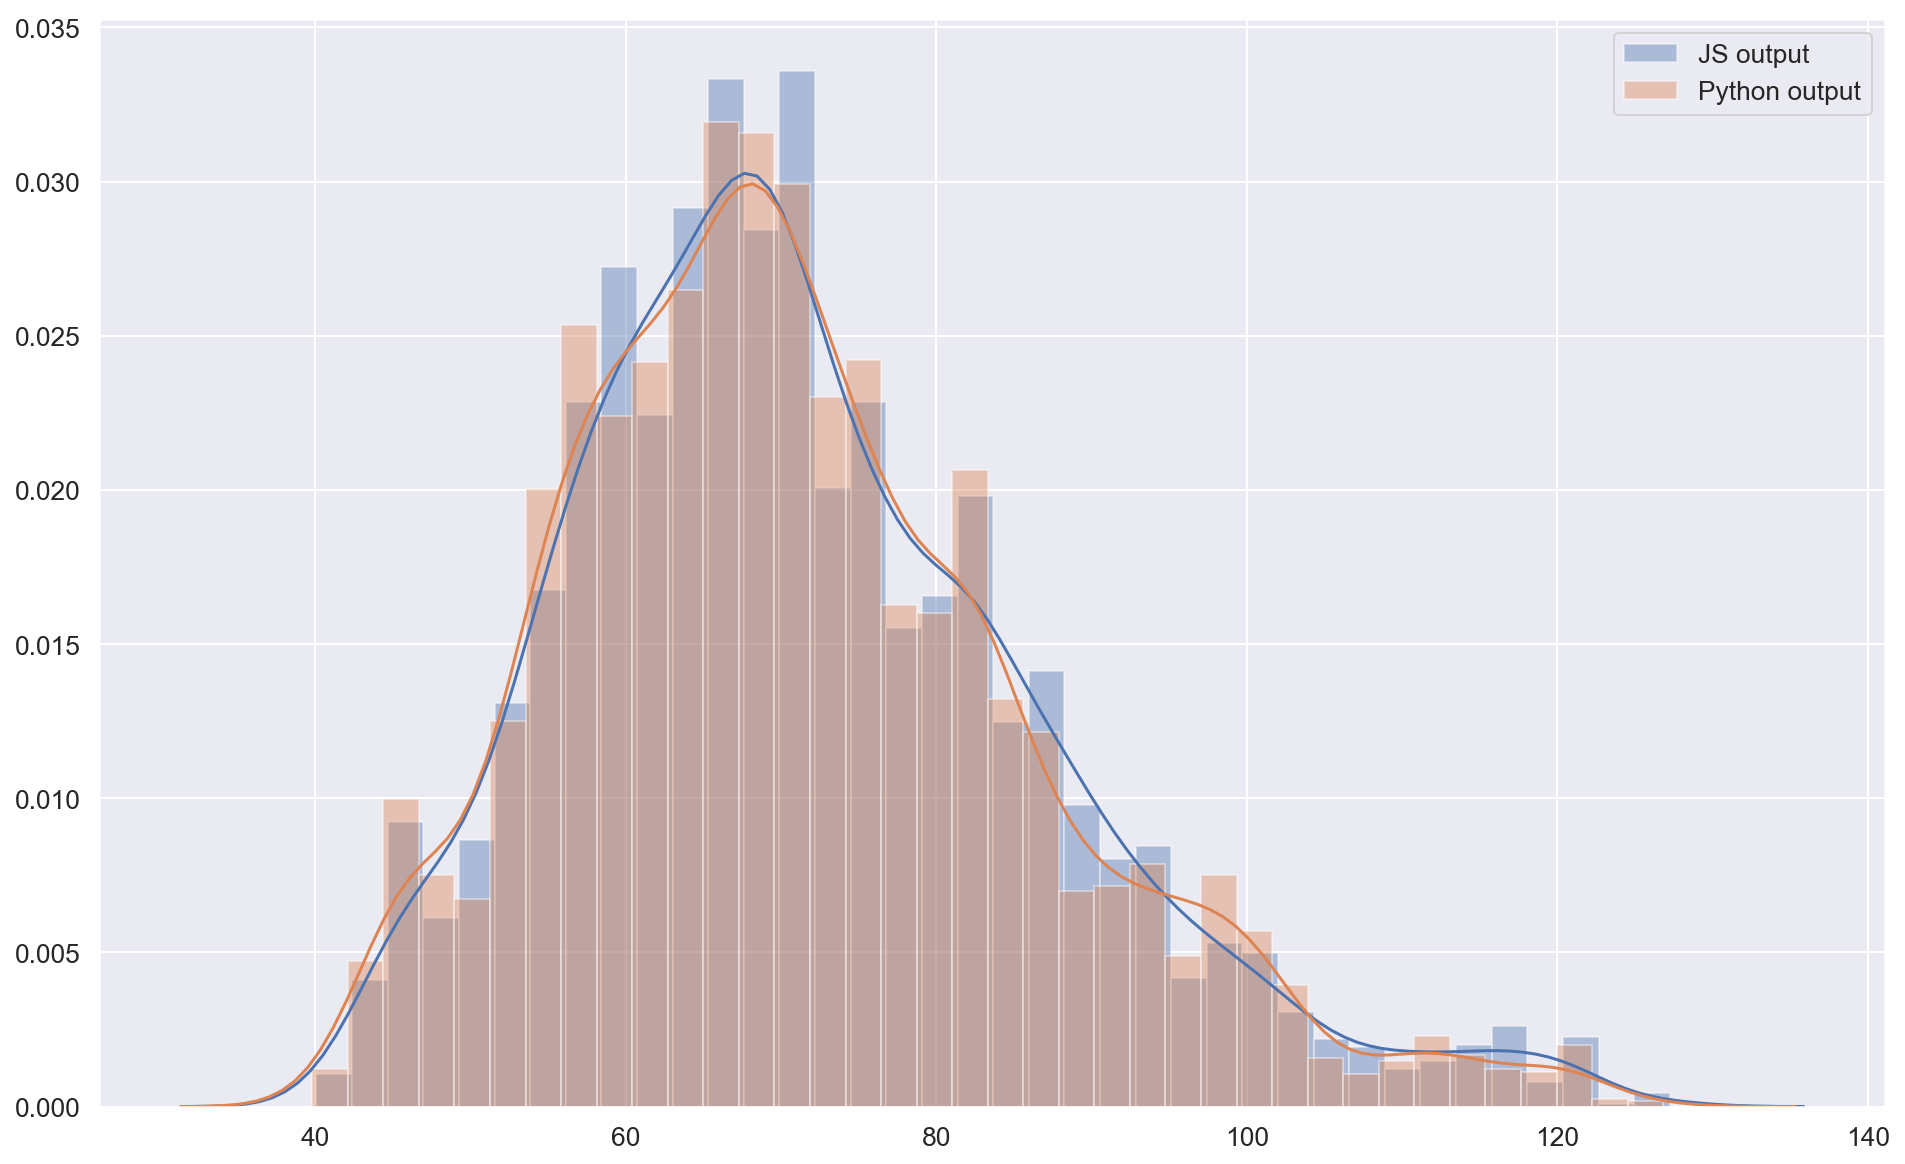

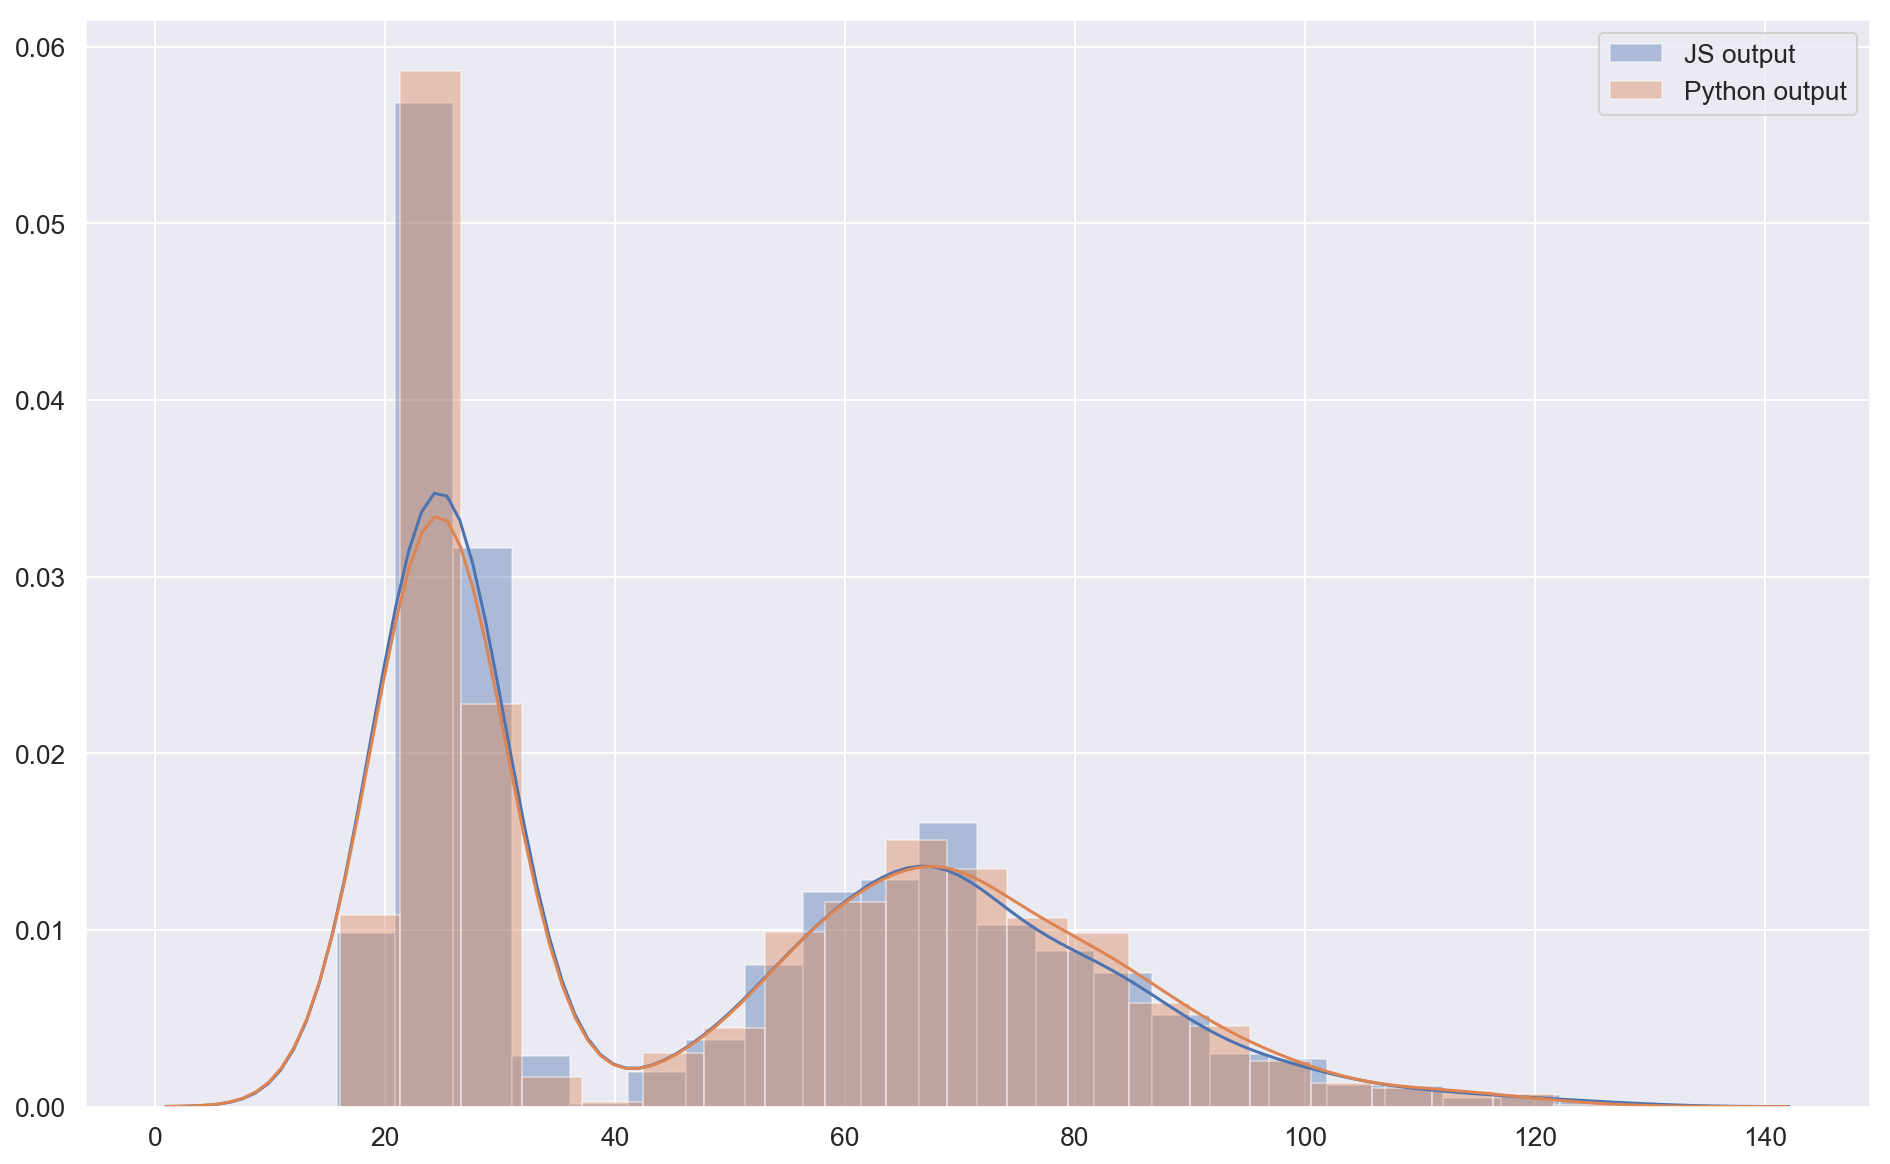

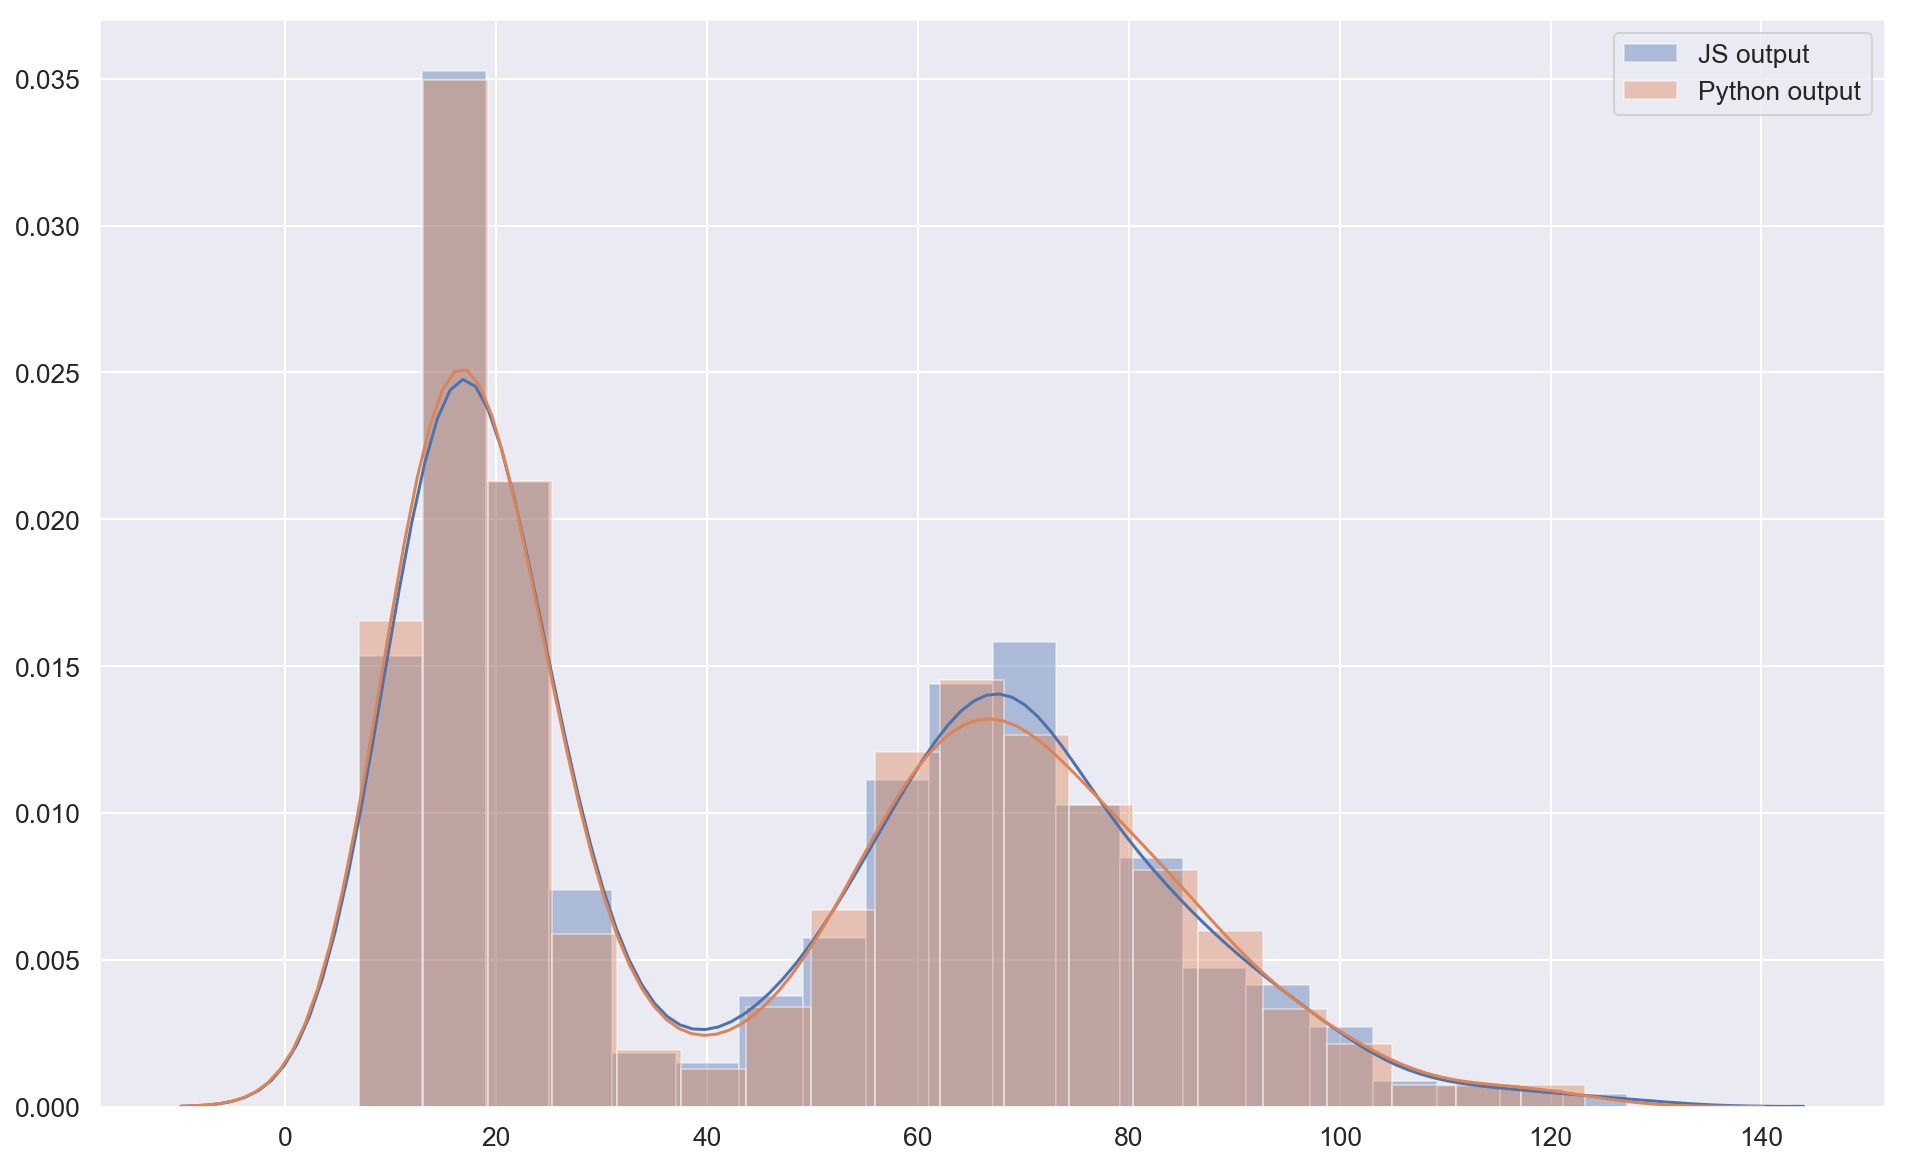

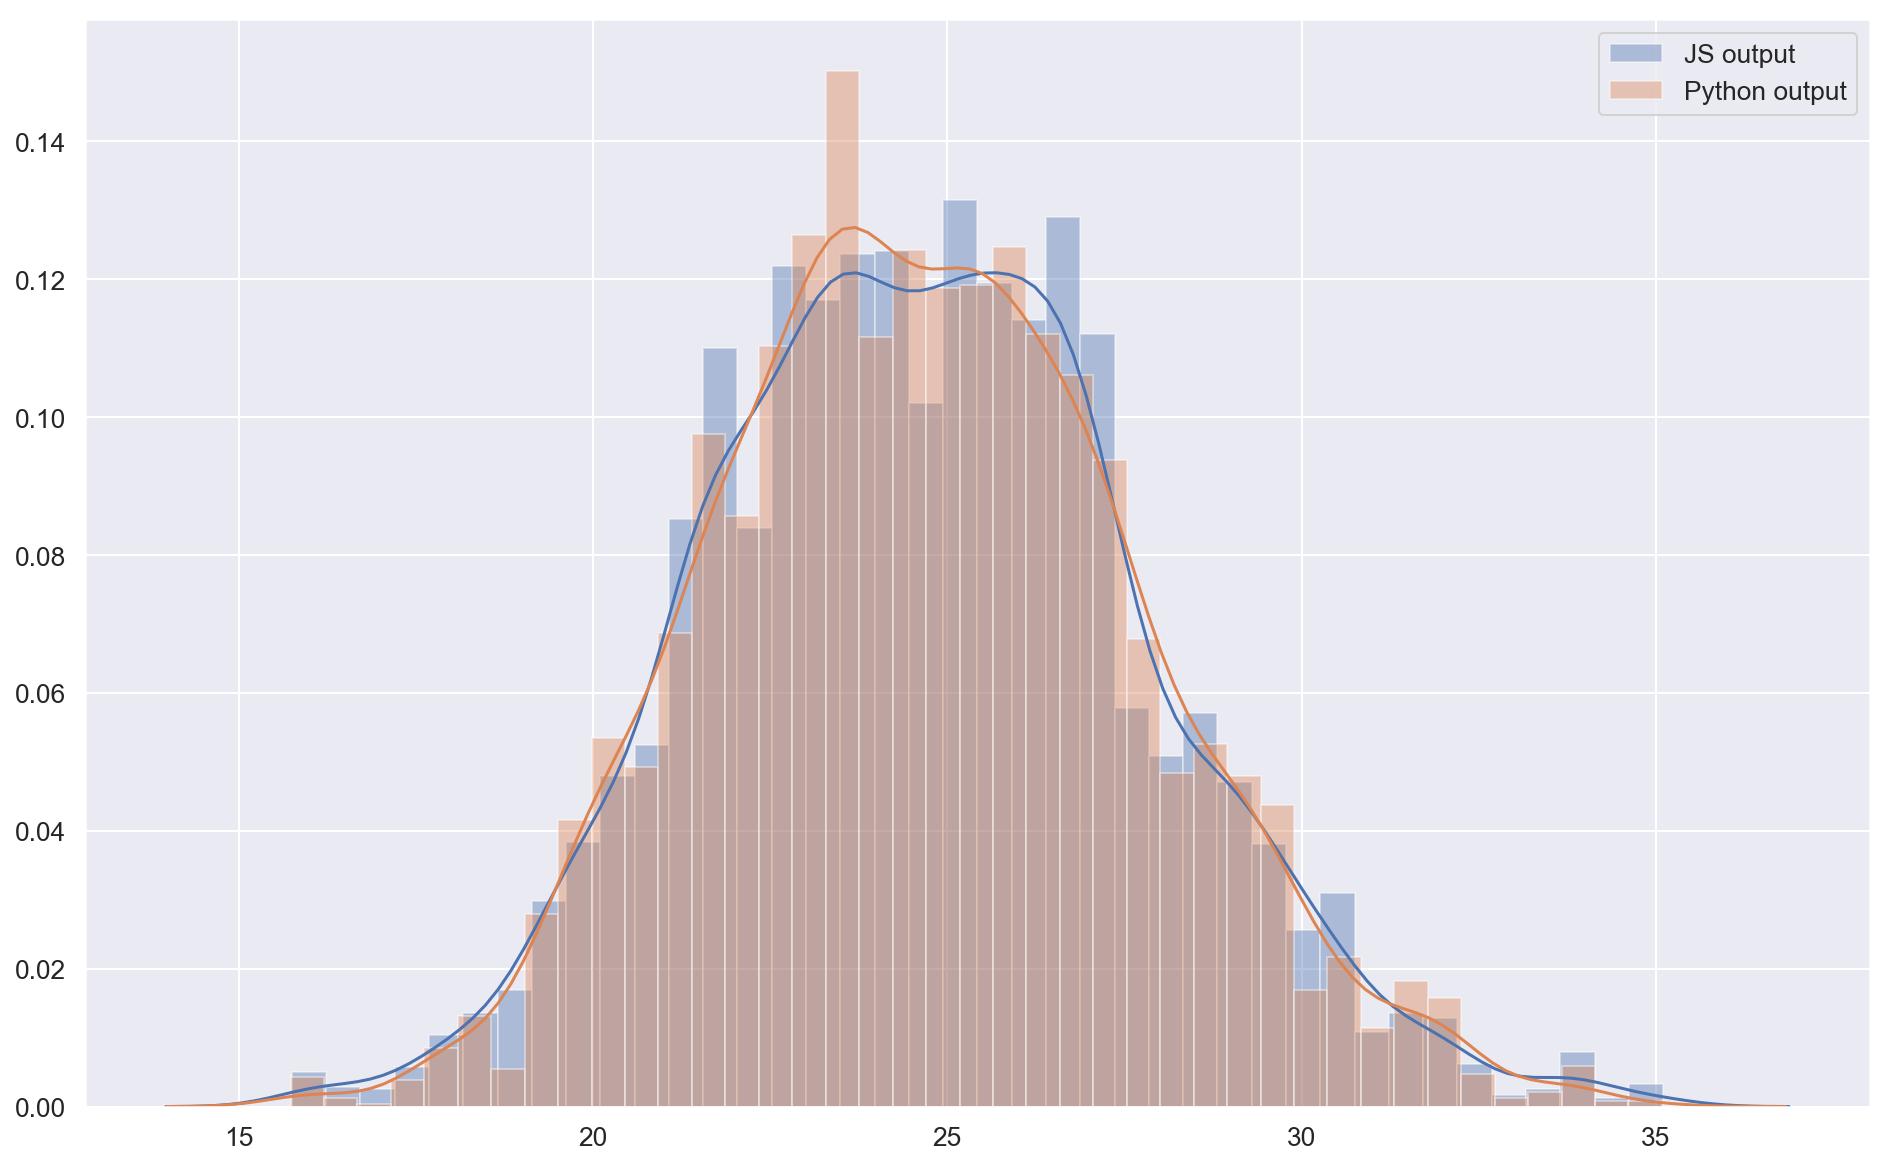

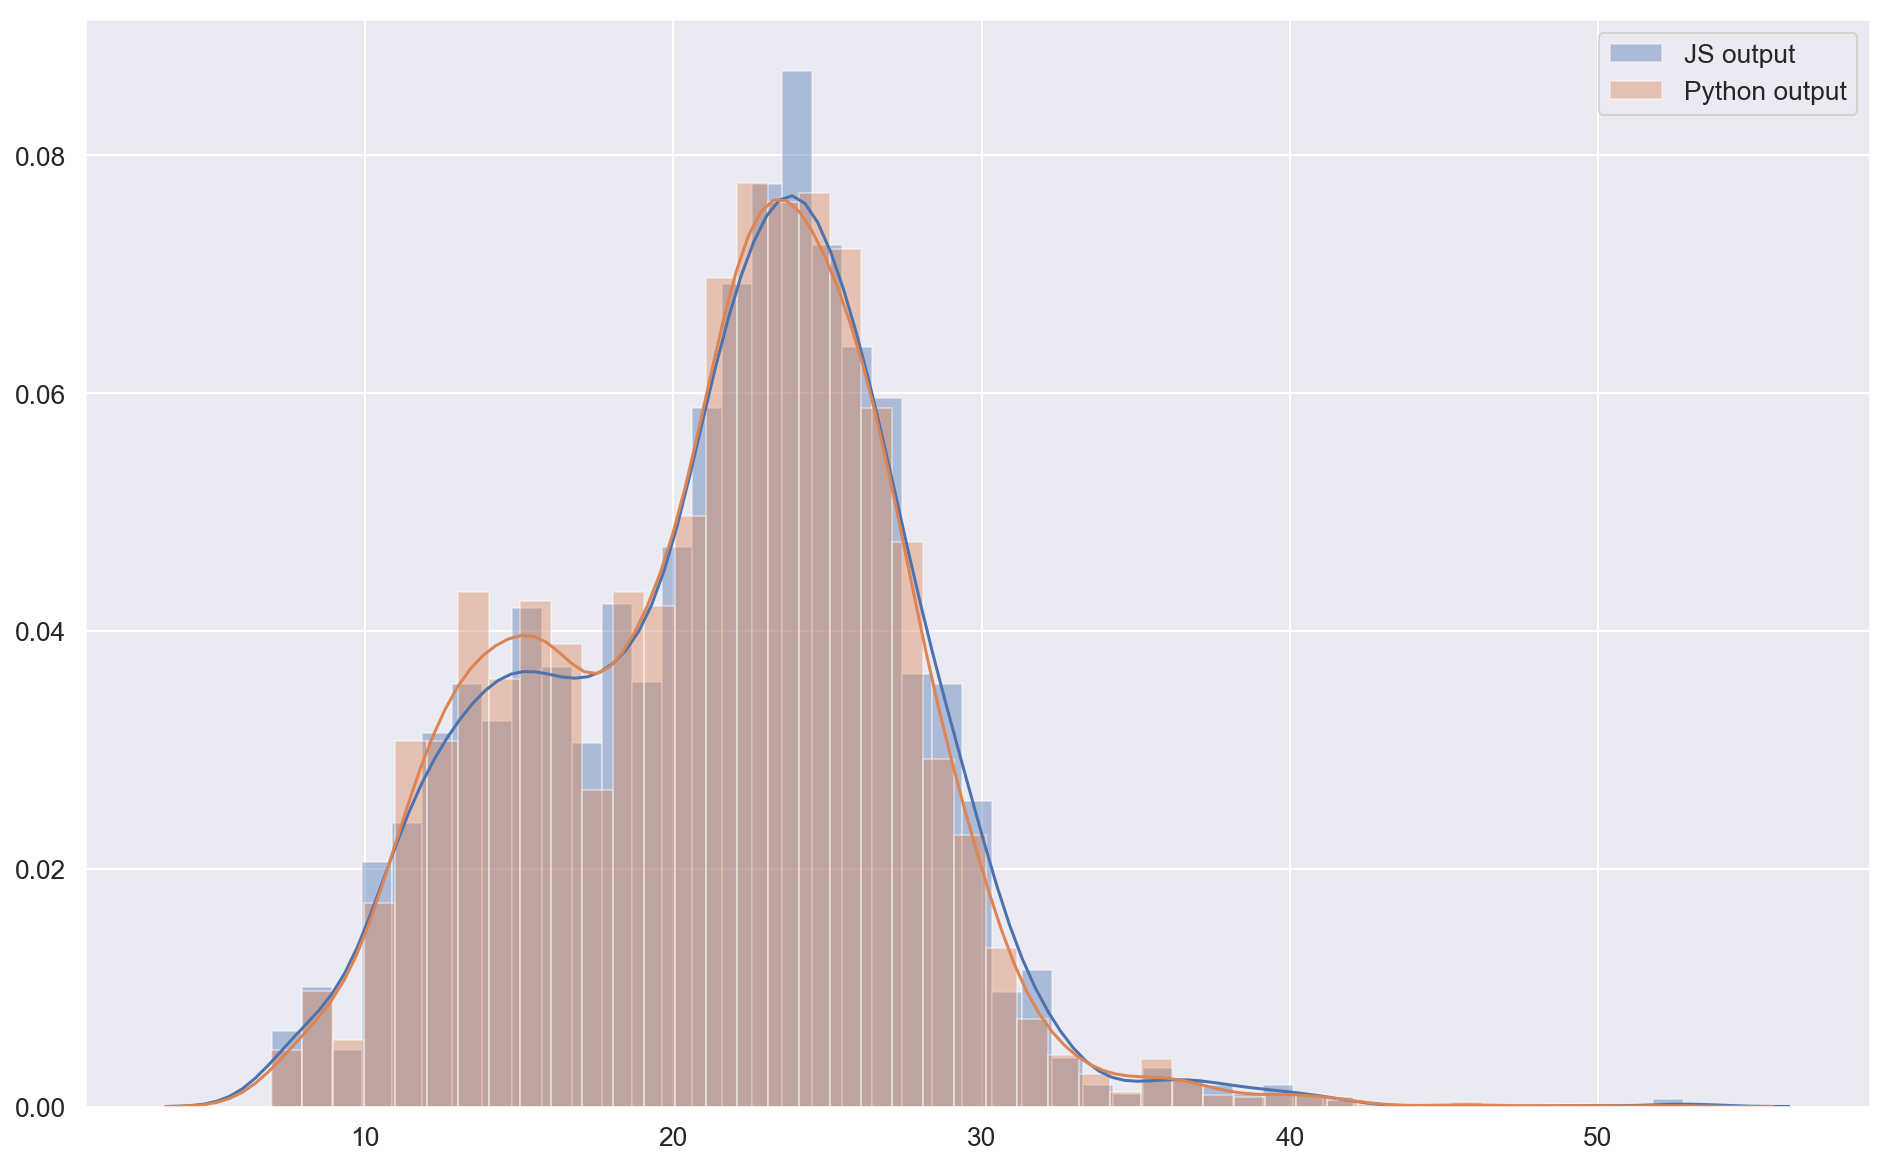

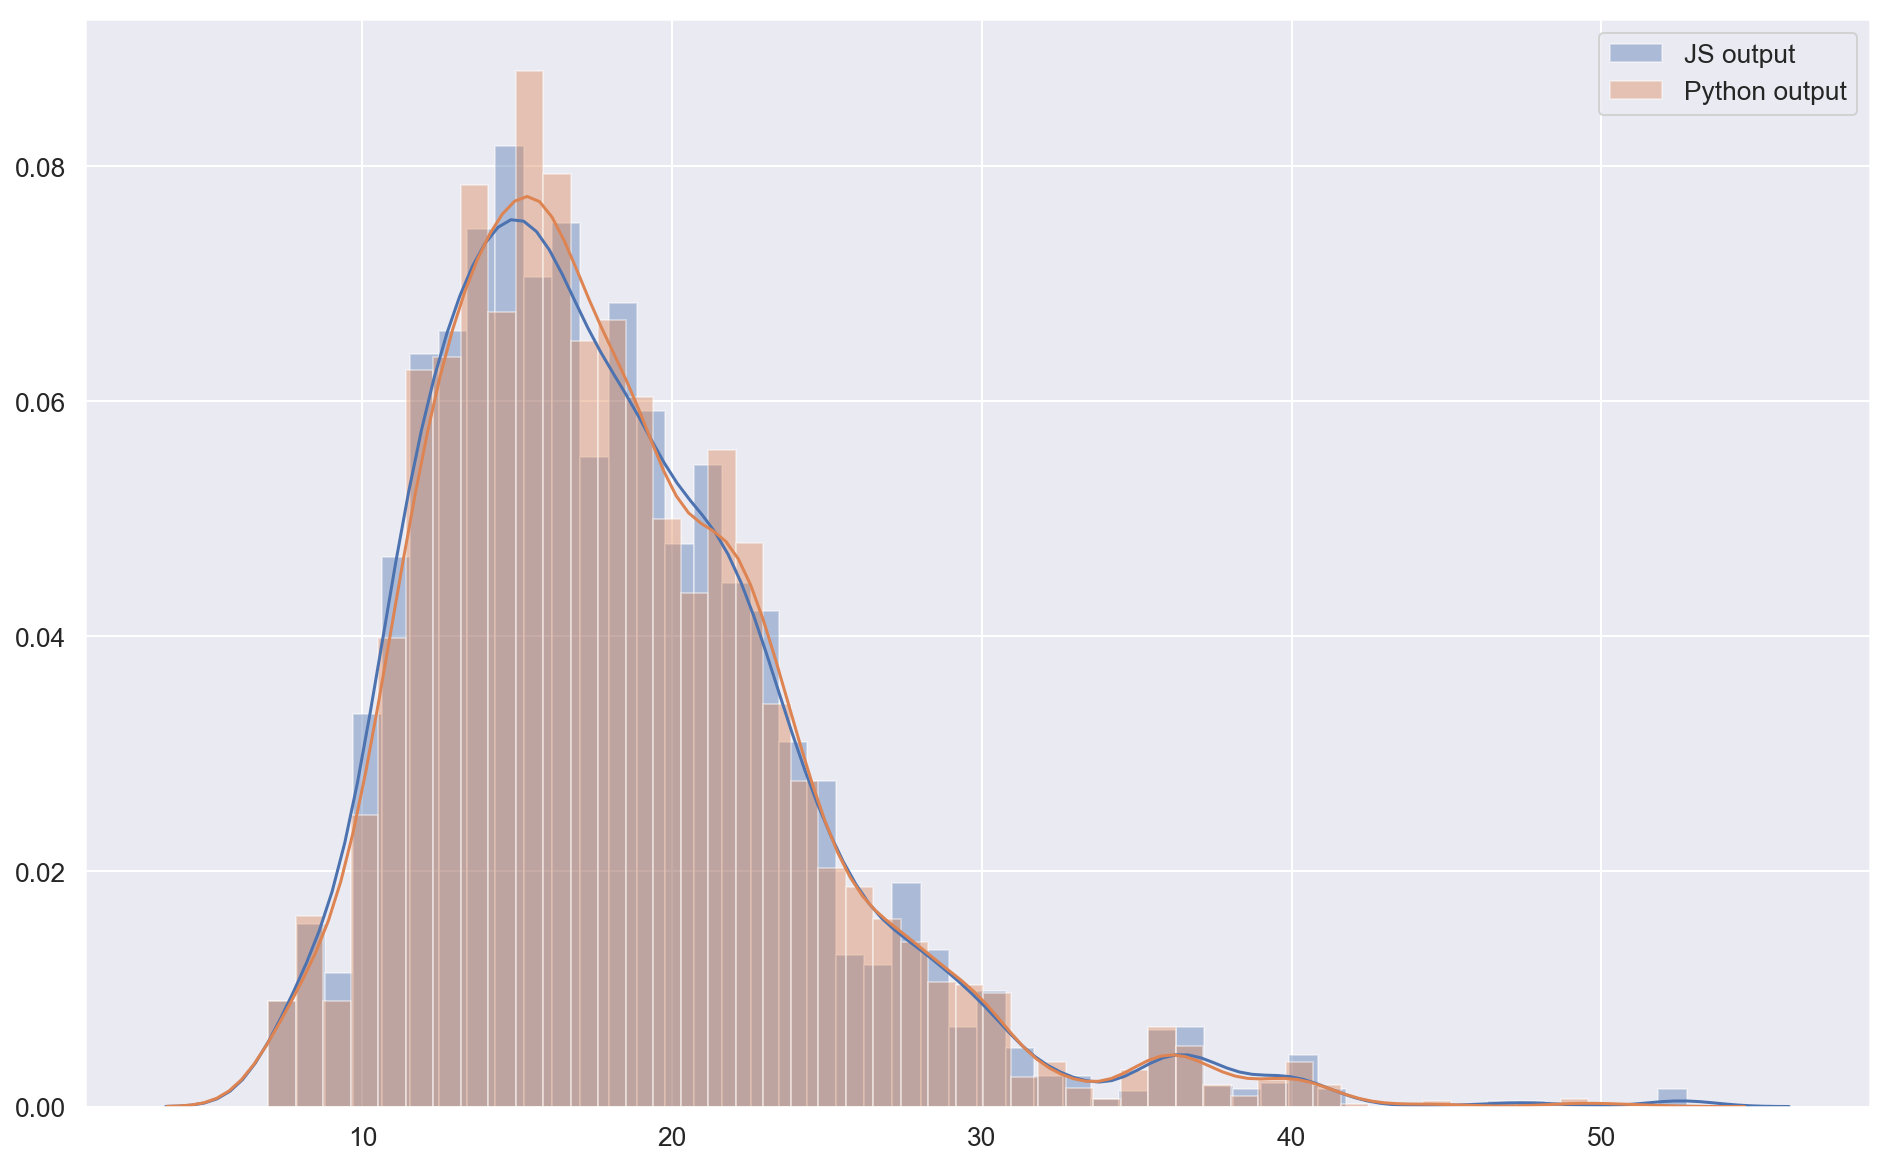

In [139]:
import itertools
N_samples = 5000


for combination in itertools.combinations_with_replacement(cdfs, 2):
    combined = CDF.combine(combination)

    script_input = json.dumps([c.get_raw_data() for c in combination])
    result = run_js_script(['combine_sample', N_samples], script_input)

    try:
        plt.figure()
        sample = result
        sns.distplot(sample, label='JS output')

        py_sample = combined.rvs(N_samples)
        sns.distplot(py_sample, label='Python output')
        plt.legend()

    except:
        print(script_run.stderr.decode('utf-8'))





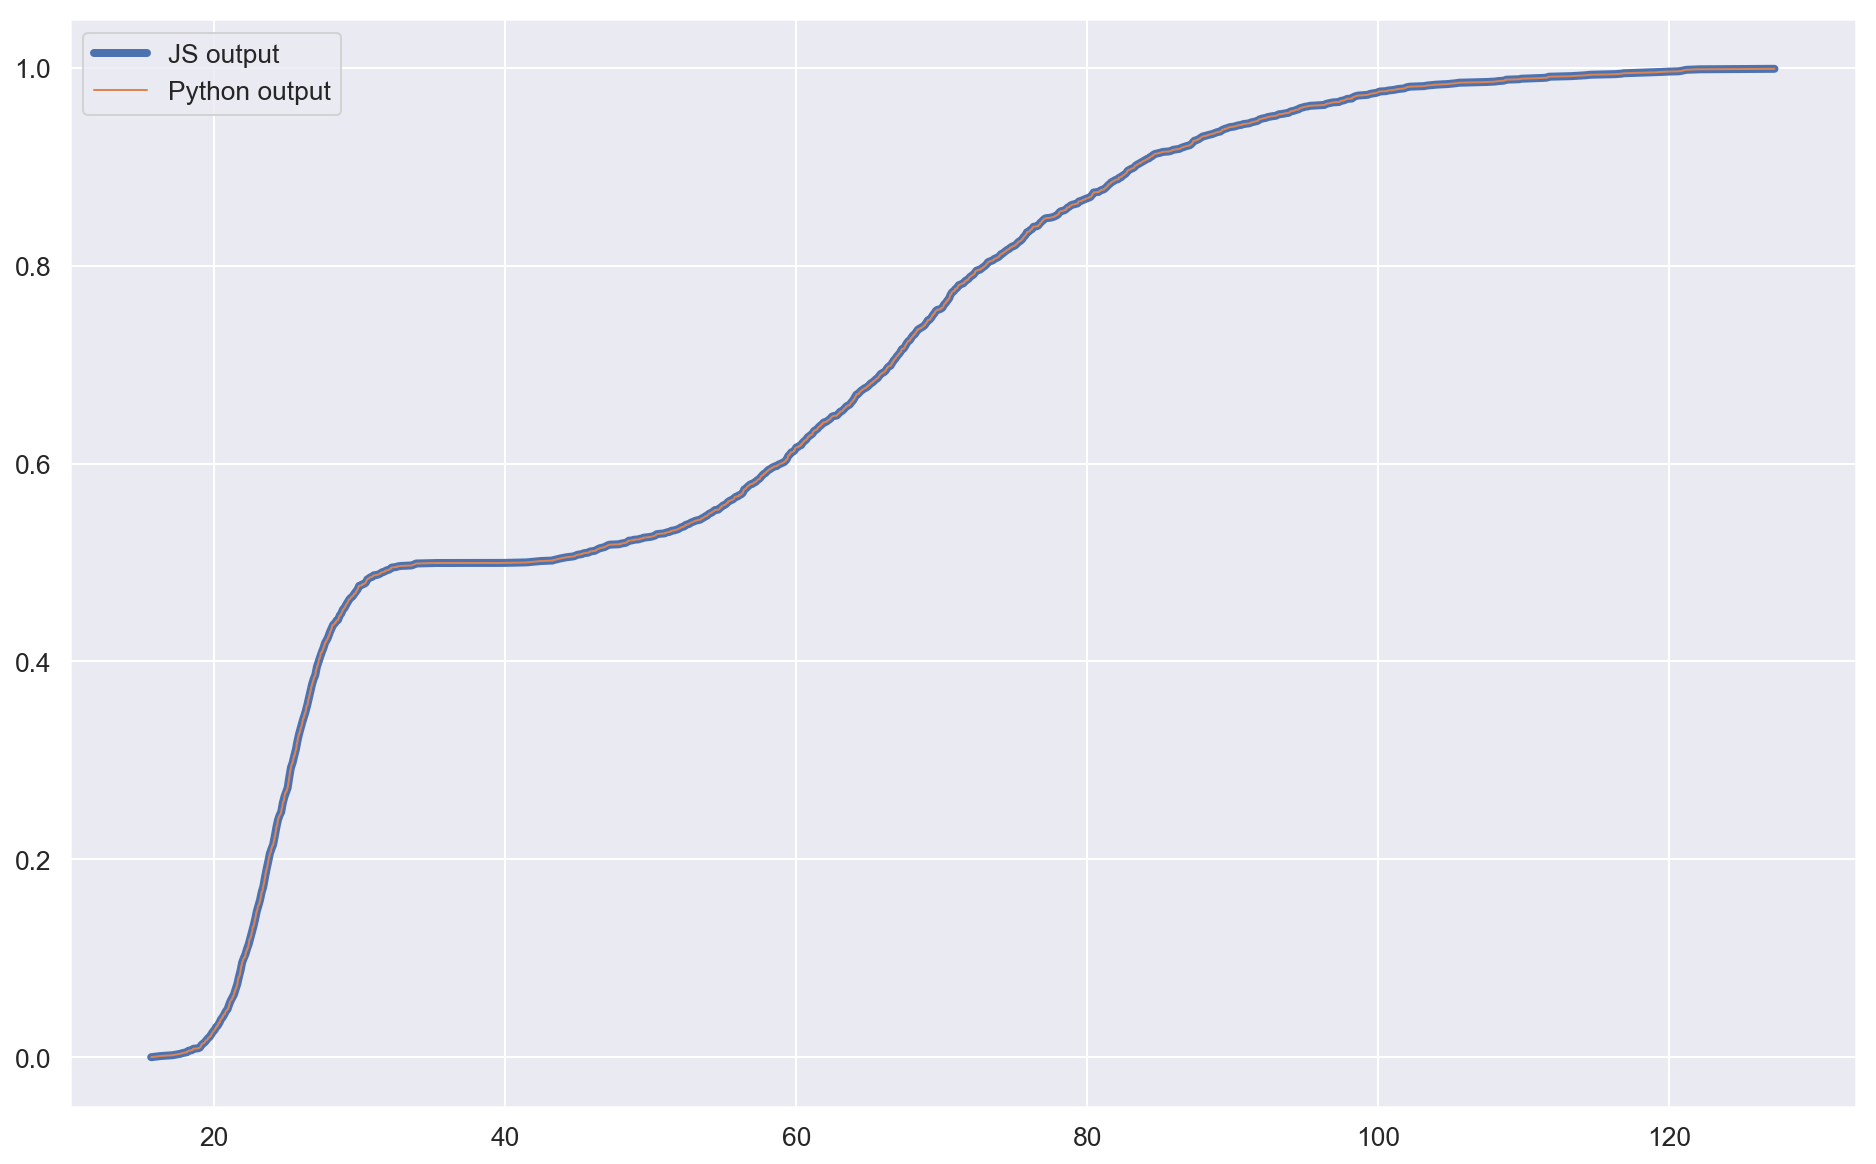

<Figure size 1152x720 with 0 Axes>

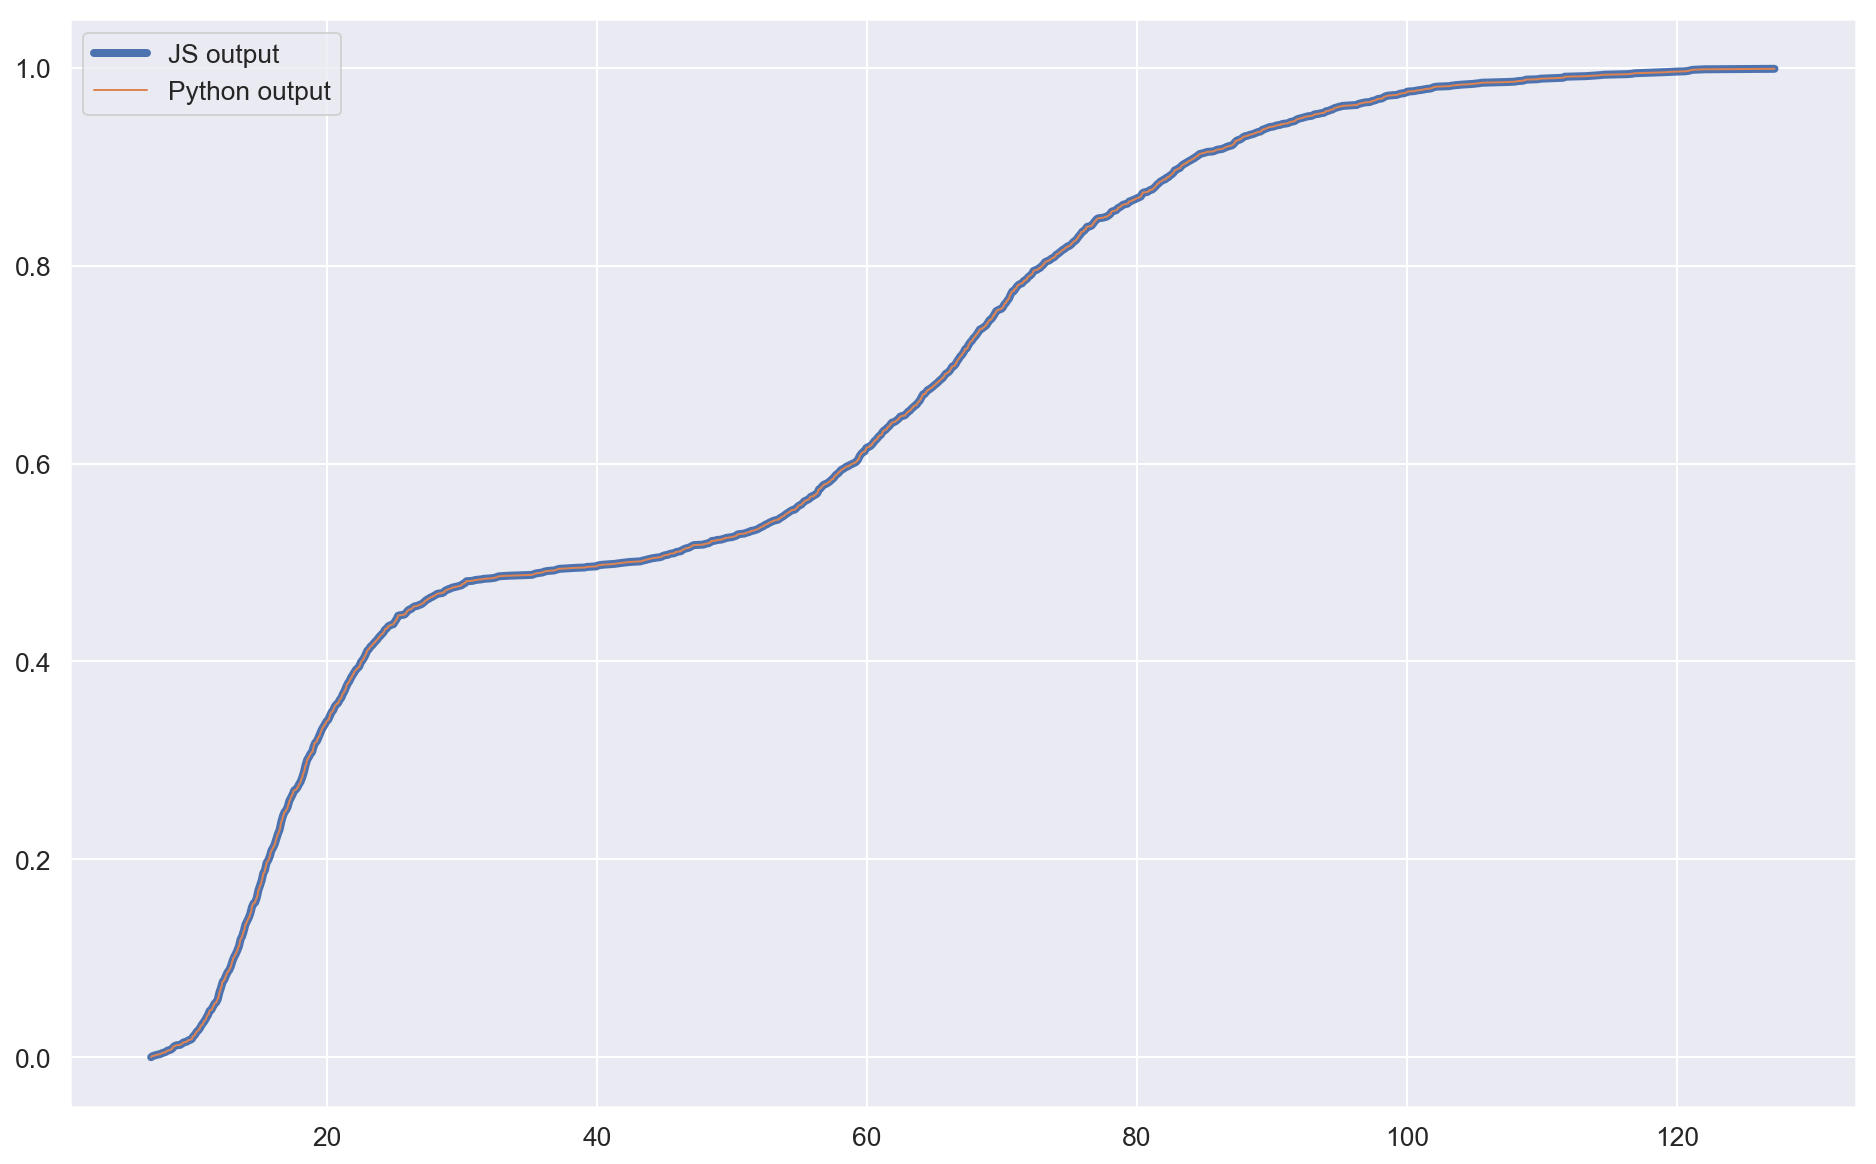

<Figure size 1152x720 with 0 Axes>

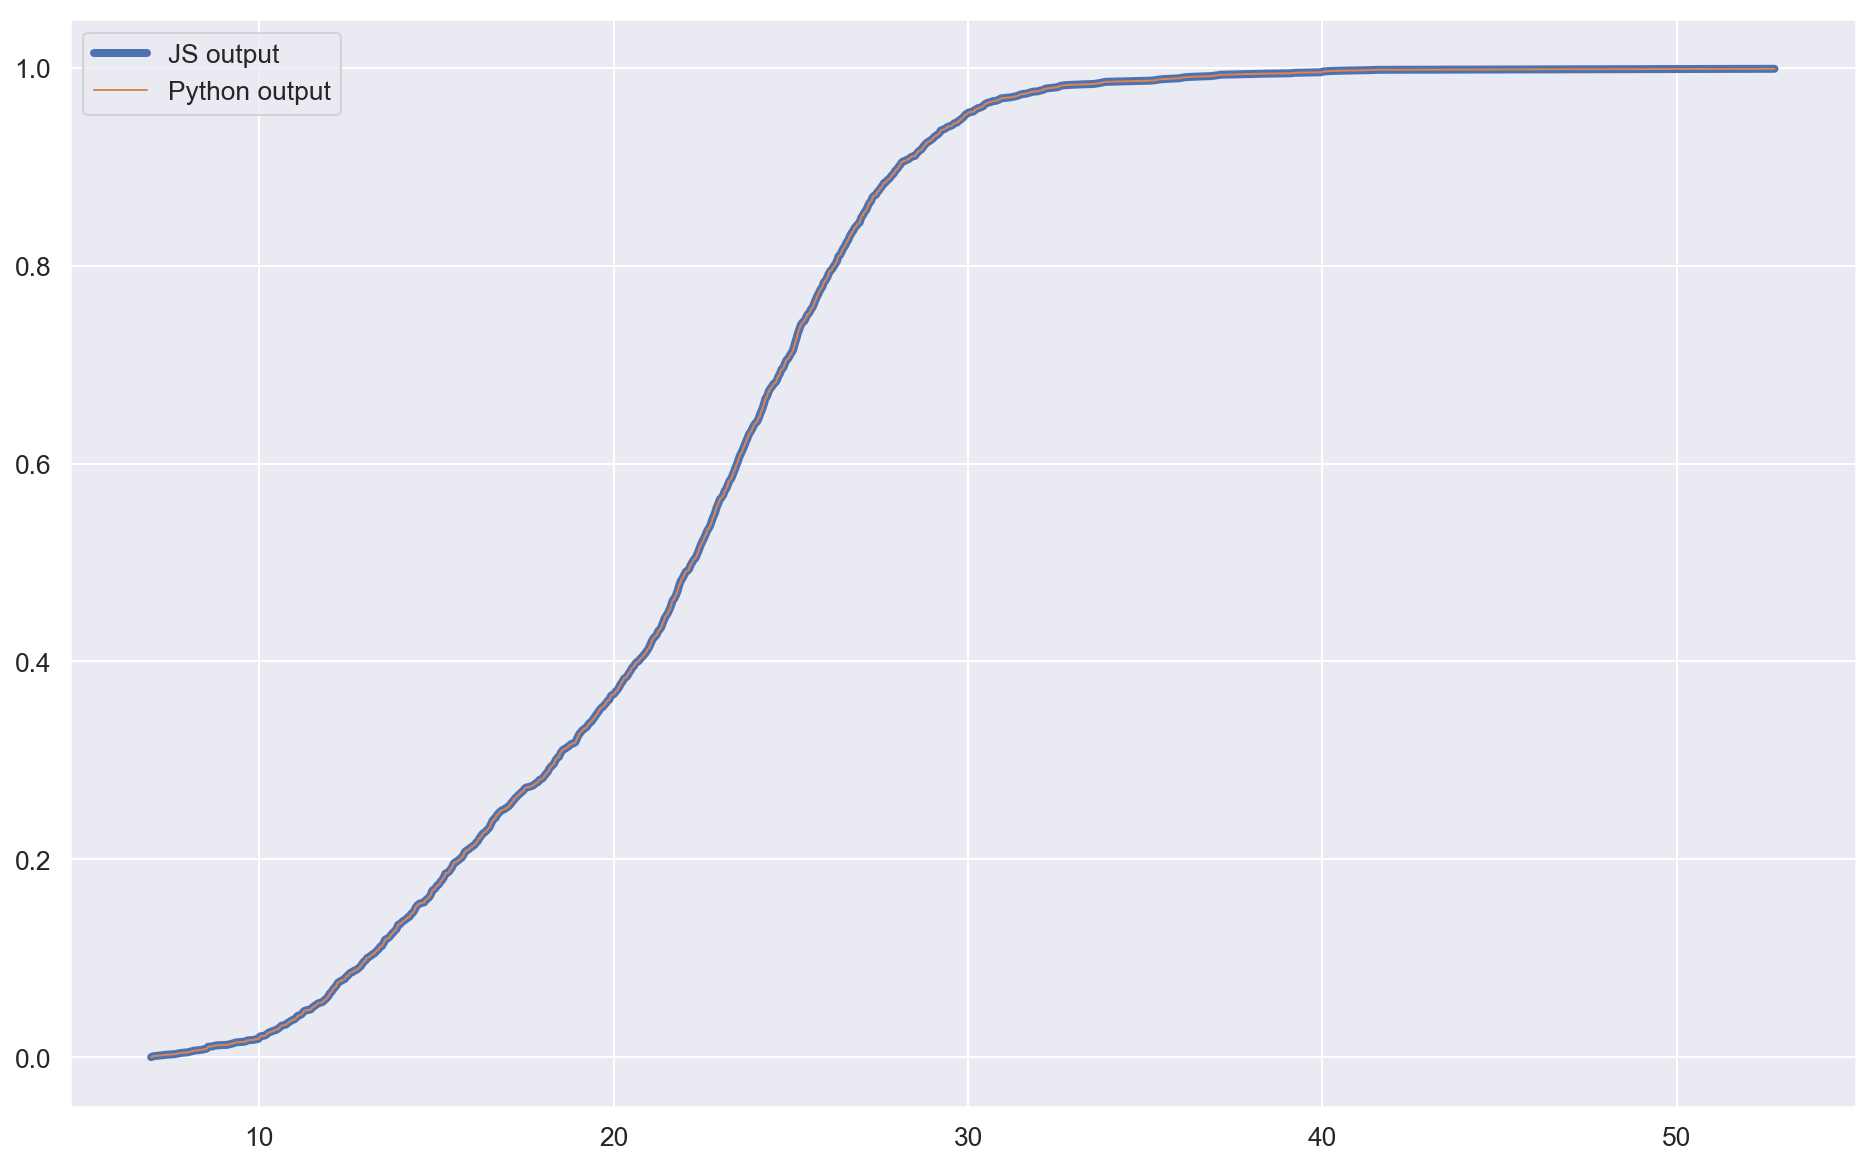

<Figure size 1152x720 with 0 Axes>

In [125]:
import itertools
N_samples = 5000


for combination in itertools.combinations(cdfs, 2):
    combined = CDF.combine(combination)

    script_input = json.dumps([c.get_raw_data() for c in combination])

    try:
        result = run_js_script(['combine_raw_cdf', N_samples], script_input)
        fig, ax = plt.subplots(1, 1)
        ax = [ax]
        plt.figure()
        cdf = result
        sns.lineplot(cdf['xs'], cdf['ys'], label='JS output', linewidth=4, ax=ax[0]).legend()

        sns.lineplot(combined.x, combined.F, label='Python output', linewidth=1, ax=ax[0]).legend()

    except:
        print(script_run.stderr.decode('utf-8'))





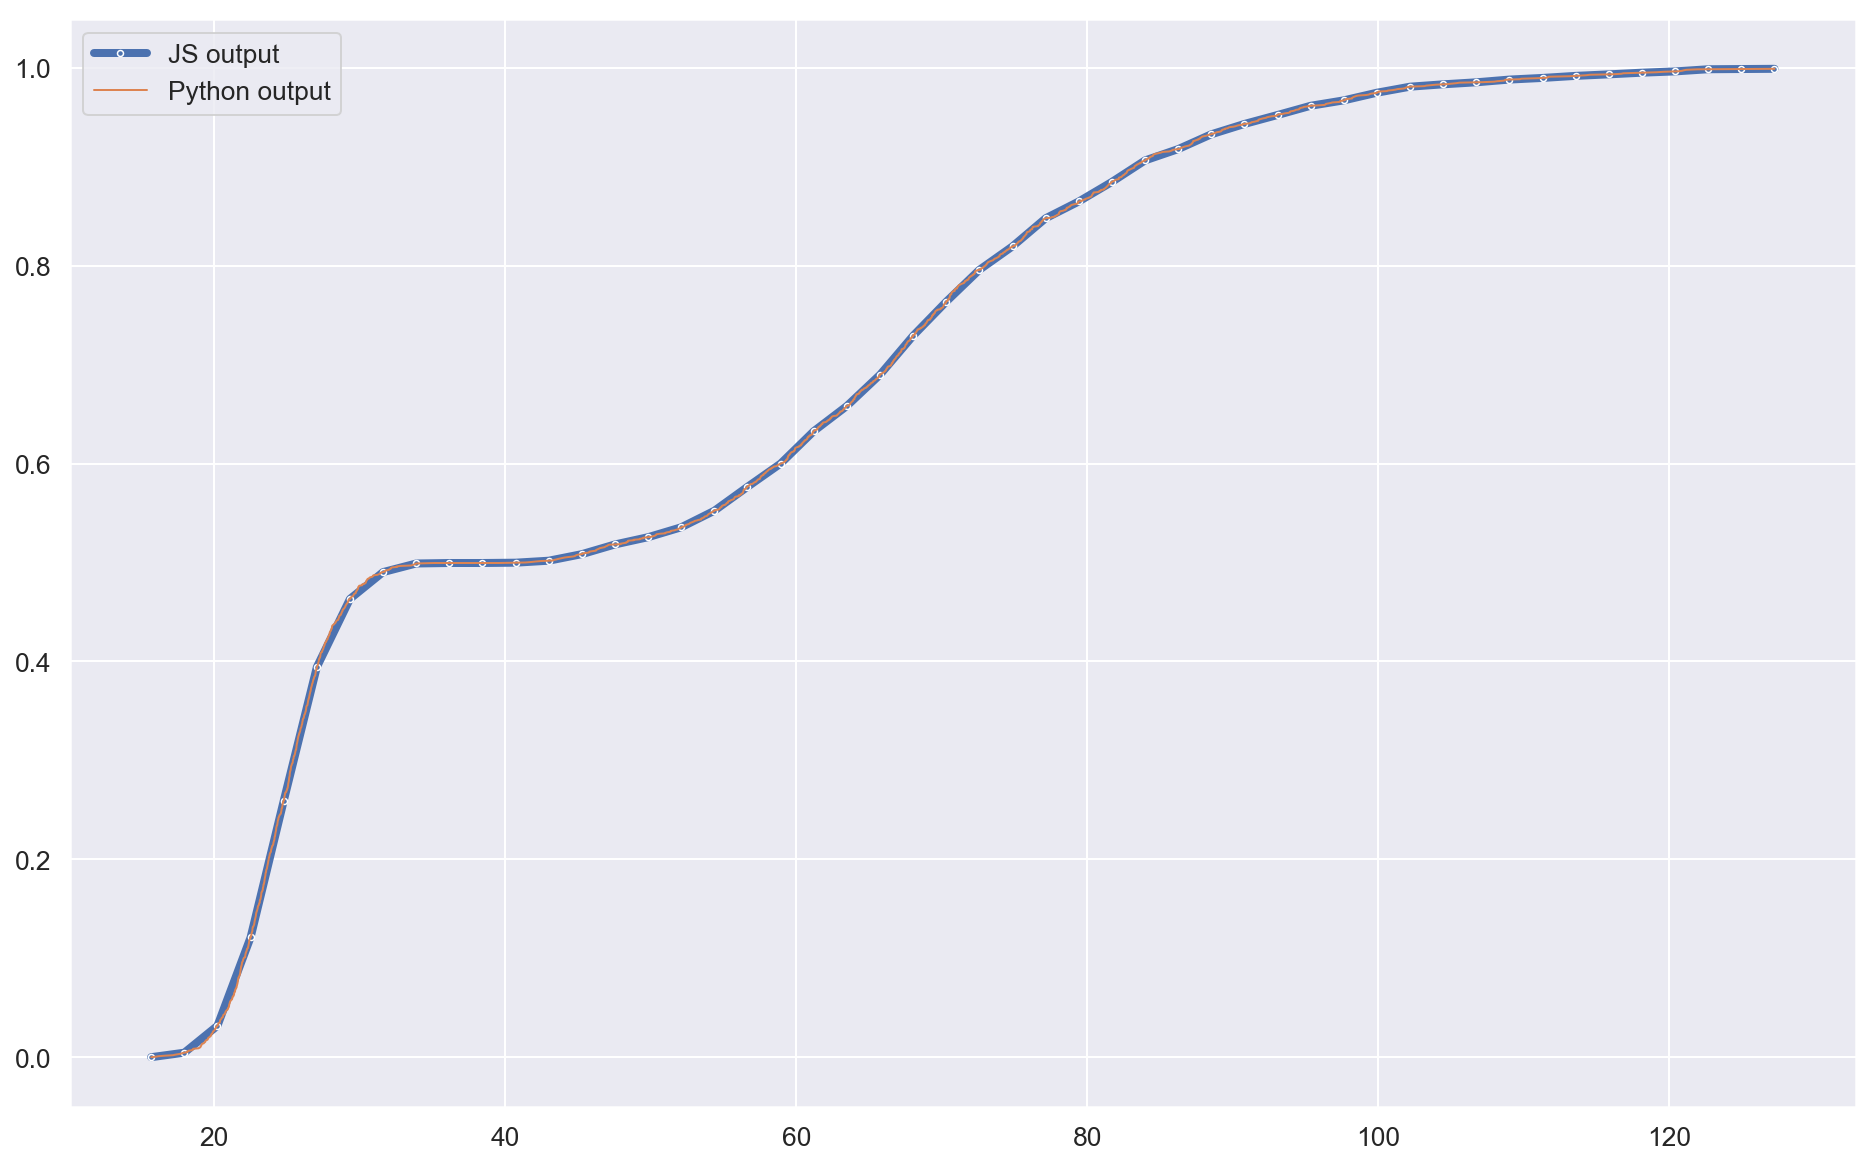

<Figure size 1152x720 with 0 Axes>

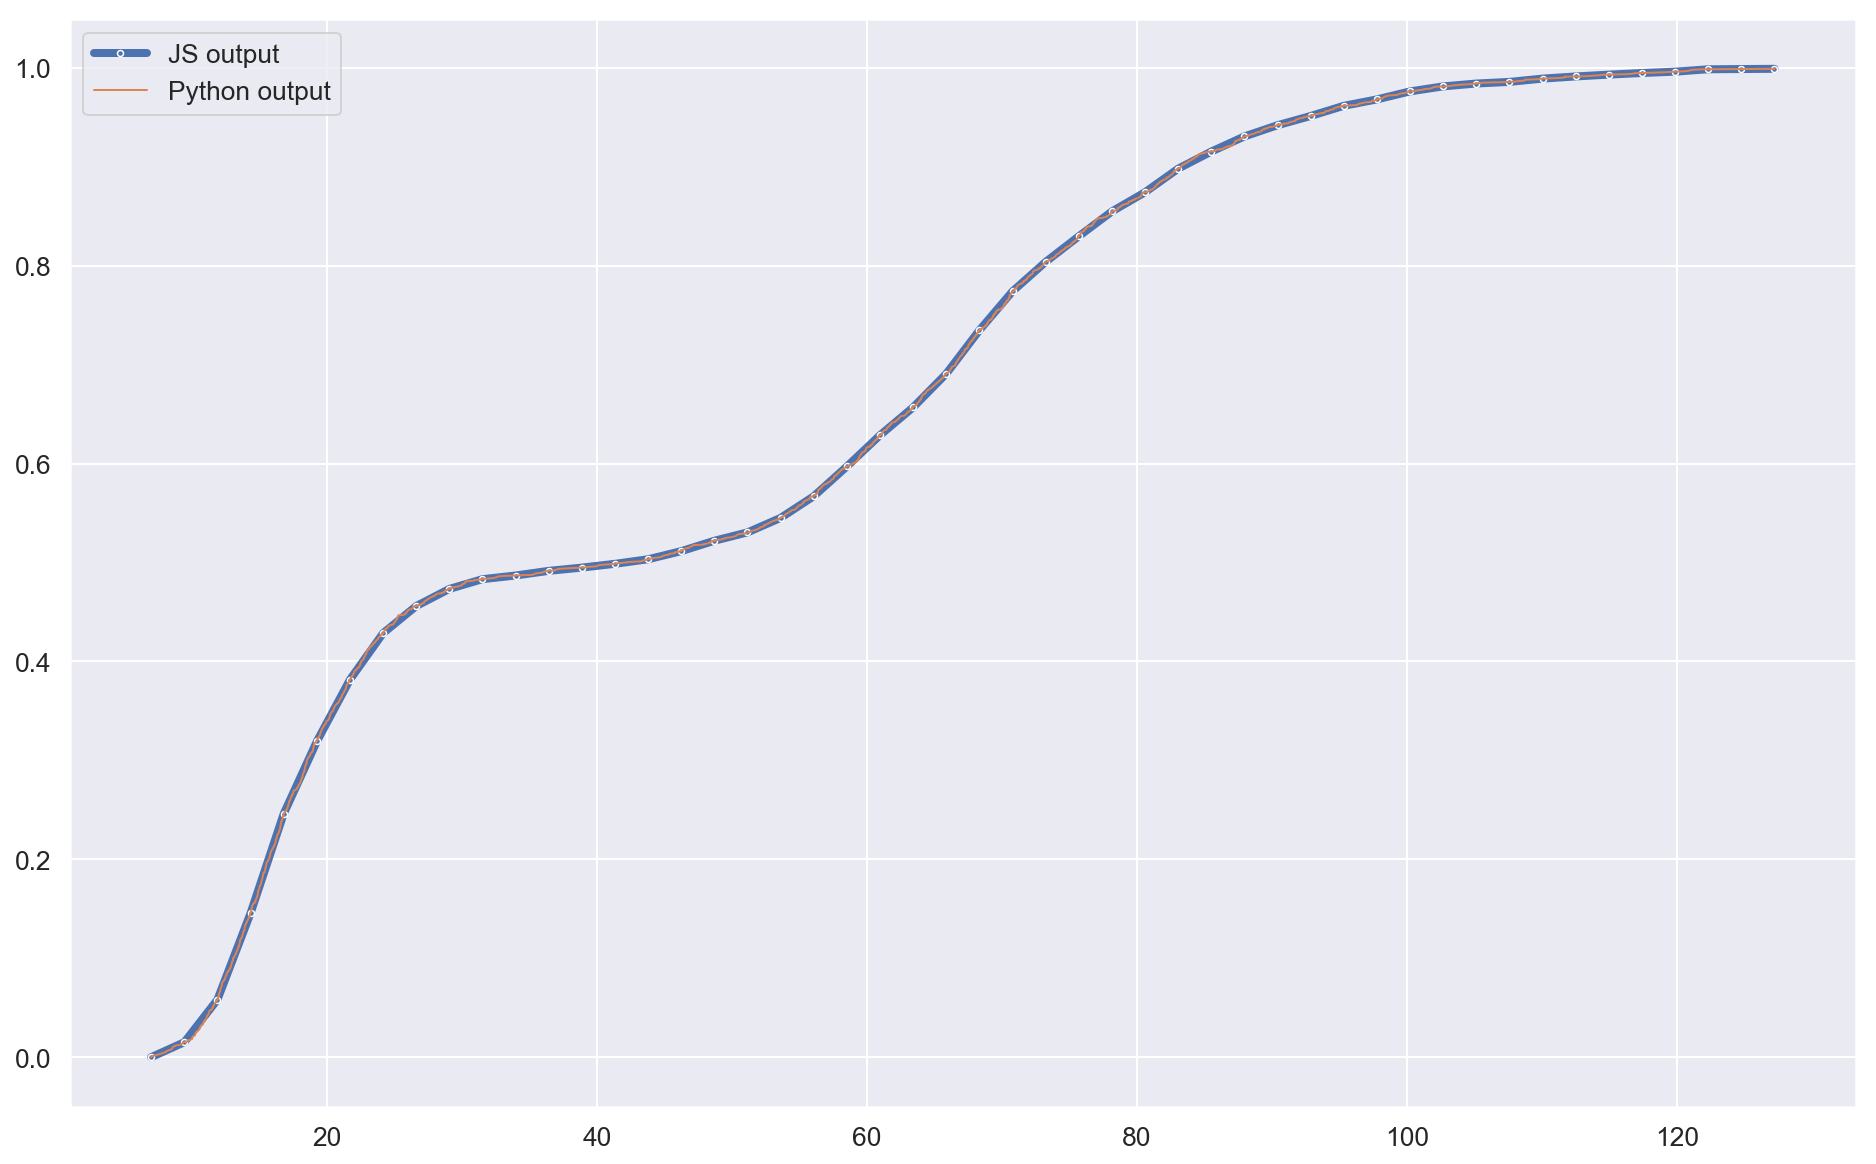

<Figure size 1152x720 with 0 Axes>

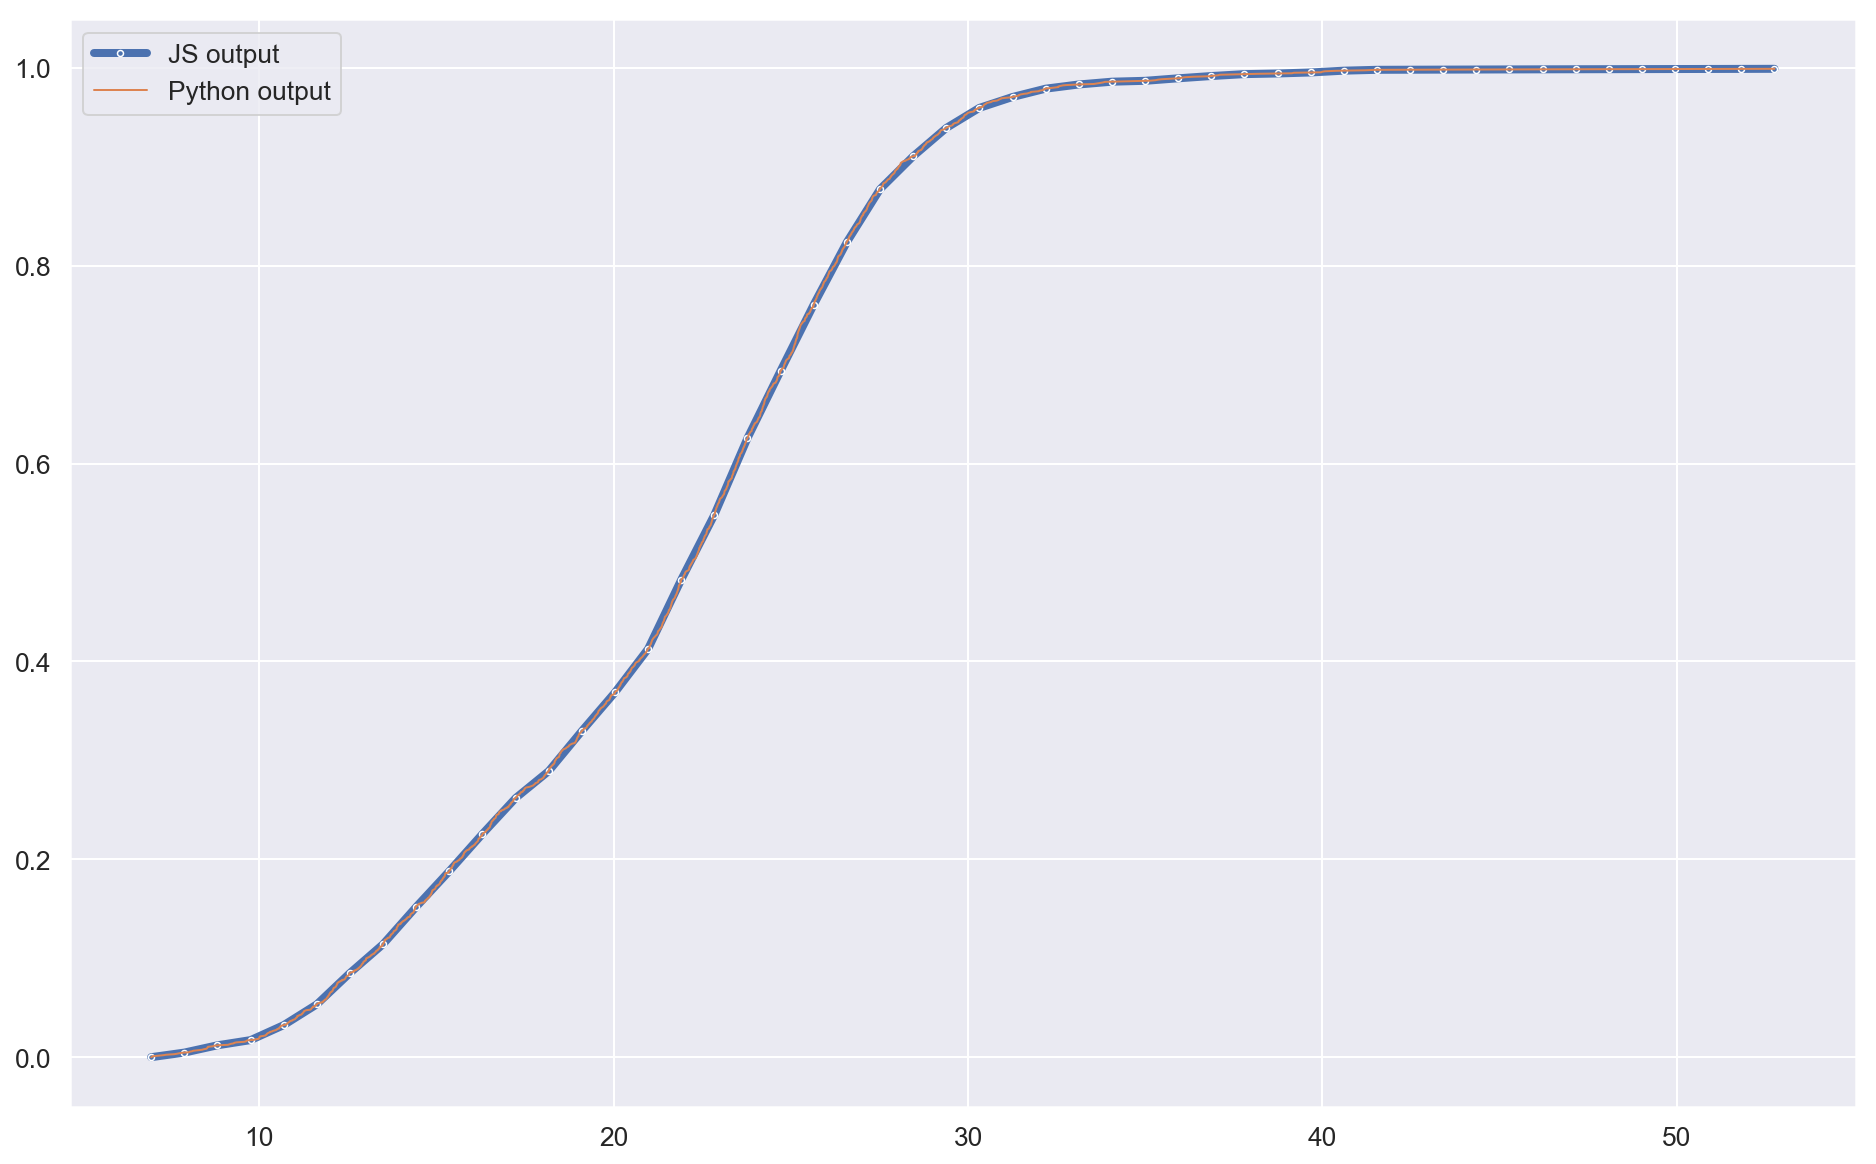

<Figure size 1152x720 with 0 Axes>

In [150]:
import itertools
range_N = 50 

for combination in itertools.combinations(cdfs, 2):
    combined = CDF.combine(combination)

    script_input = json.dumps([combined.get_raw_data()])

    try:
        result = run_js_script(['new_range', range_N], script_input)
        fig, ax = plt.subplots(1, 1)
        ax = [ax]
        plt.figure()
        cdf = result
        sns.lineplot(cdf['xs'], cdf['ys'], label='JS output', marker='.', linewidth=4, ax=ax[0]).legend()

        sns.lineplot(combined.x, combined.F, label='Python output', linewidth=1, ax=ax[0]).legend()

    except:
        print(script_run.stderr.decode('utf-8'))



